<h1>1. Import Librairies</h1>

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

<h1>2.Reading the Dataset</h1>

In [273]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h2>2.1 Checking missing values</h2>

In [274]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<h1>3. Droping unnecessary columns</h1>

In [275]:
#All values in column "Unnamed: 32" are missing and the "id" column are irrelevant for the rest of our study.
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

#check if 'Unnamed:32' variable is removed
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h1>4. Data Preprocessing</h1>

<h2>4.1 Data Scaling</h2>

In [276]:
#select numerical variables
num_features = list(data.columns)
num_features.remove('diagnosis')

#Normalizing numerical variables
data[num_features] = (data[num_features] - data[num_features].min())/(data[num_features].max() -data[num_features].min())

#view data after scaling
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


<h2>4.2 Data Encoding</h2>


In [277]:
#Encoding Binary variable 

encoder = LabelEncoder()
data['diagnosis'] = encoder.fit_transform(data['diagnosis'])

<h1>5. Visualization</h1>

<h2>5.1 Pair Plots for the features.</h2> 

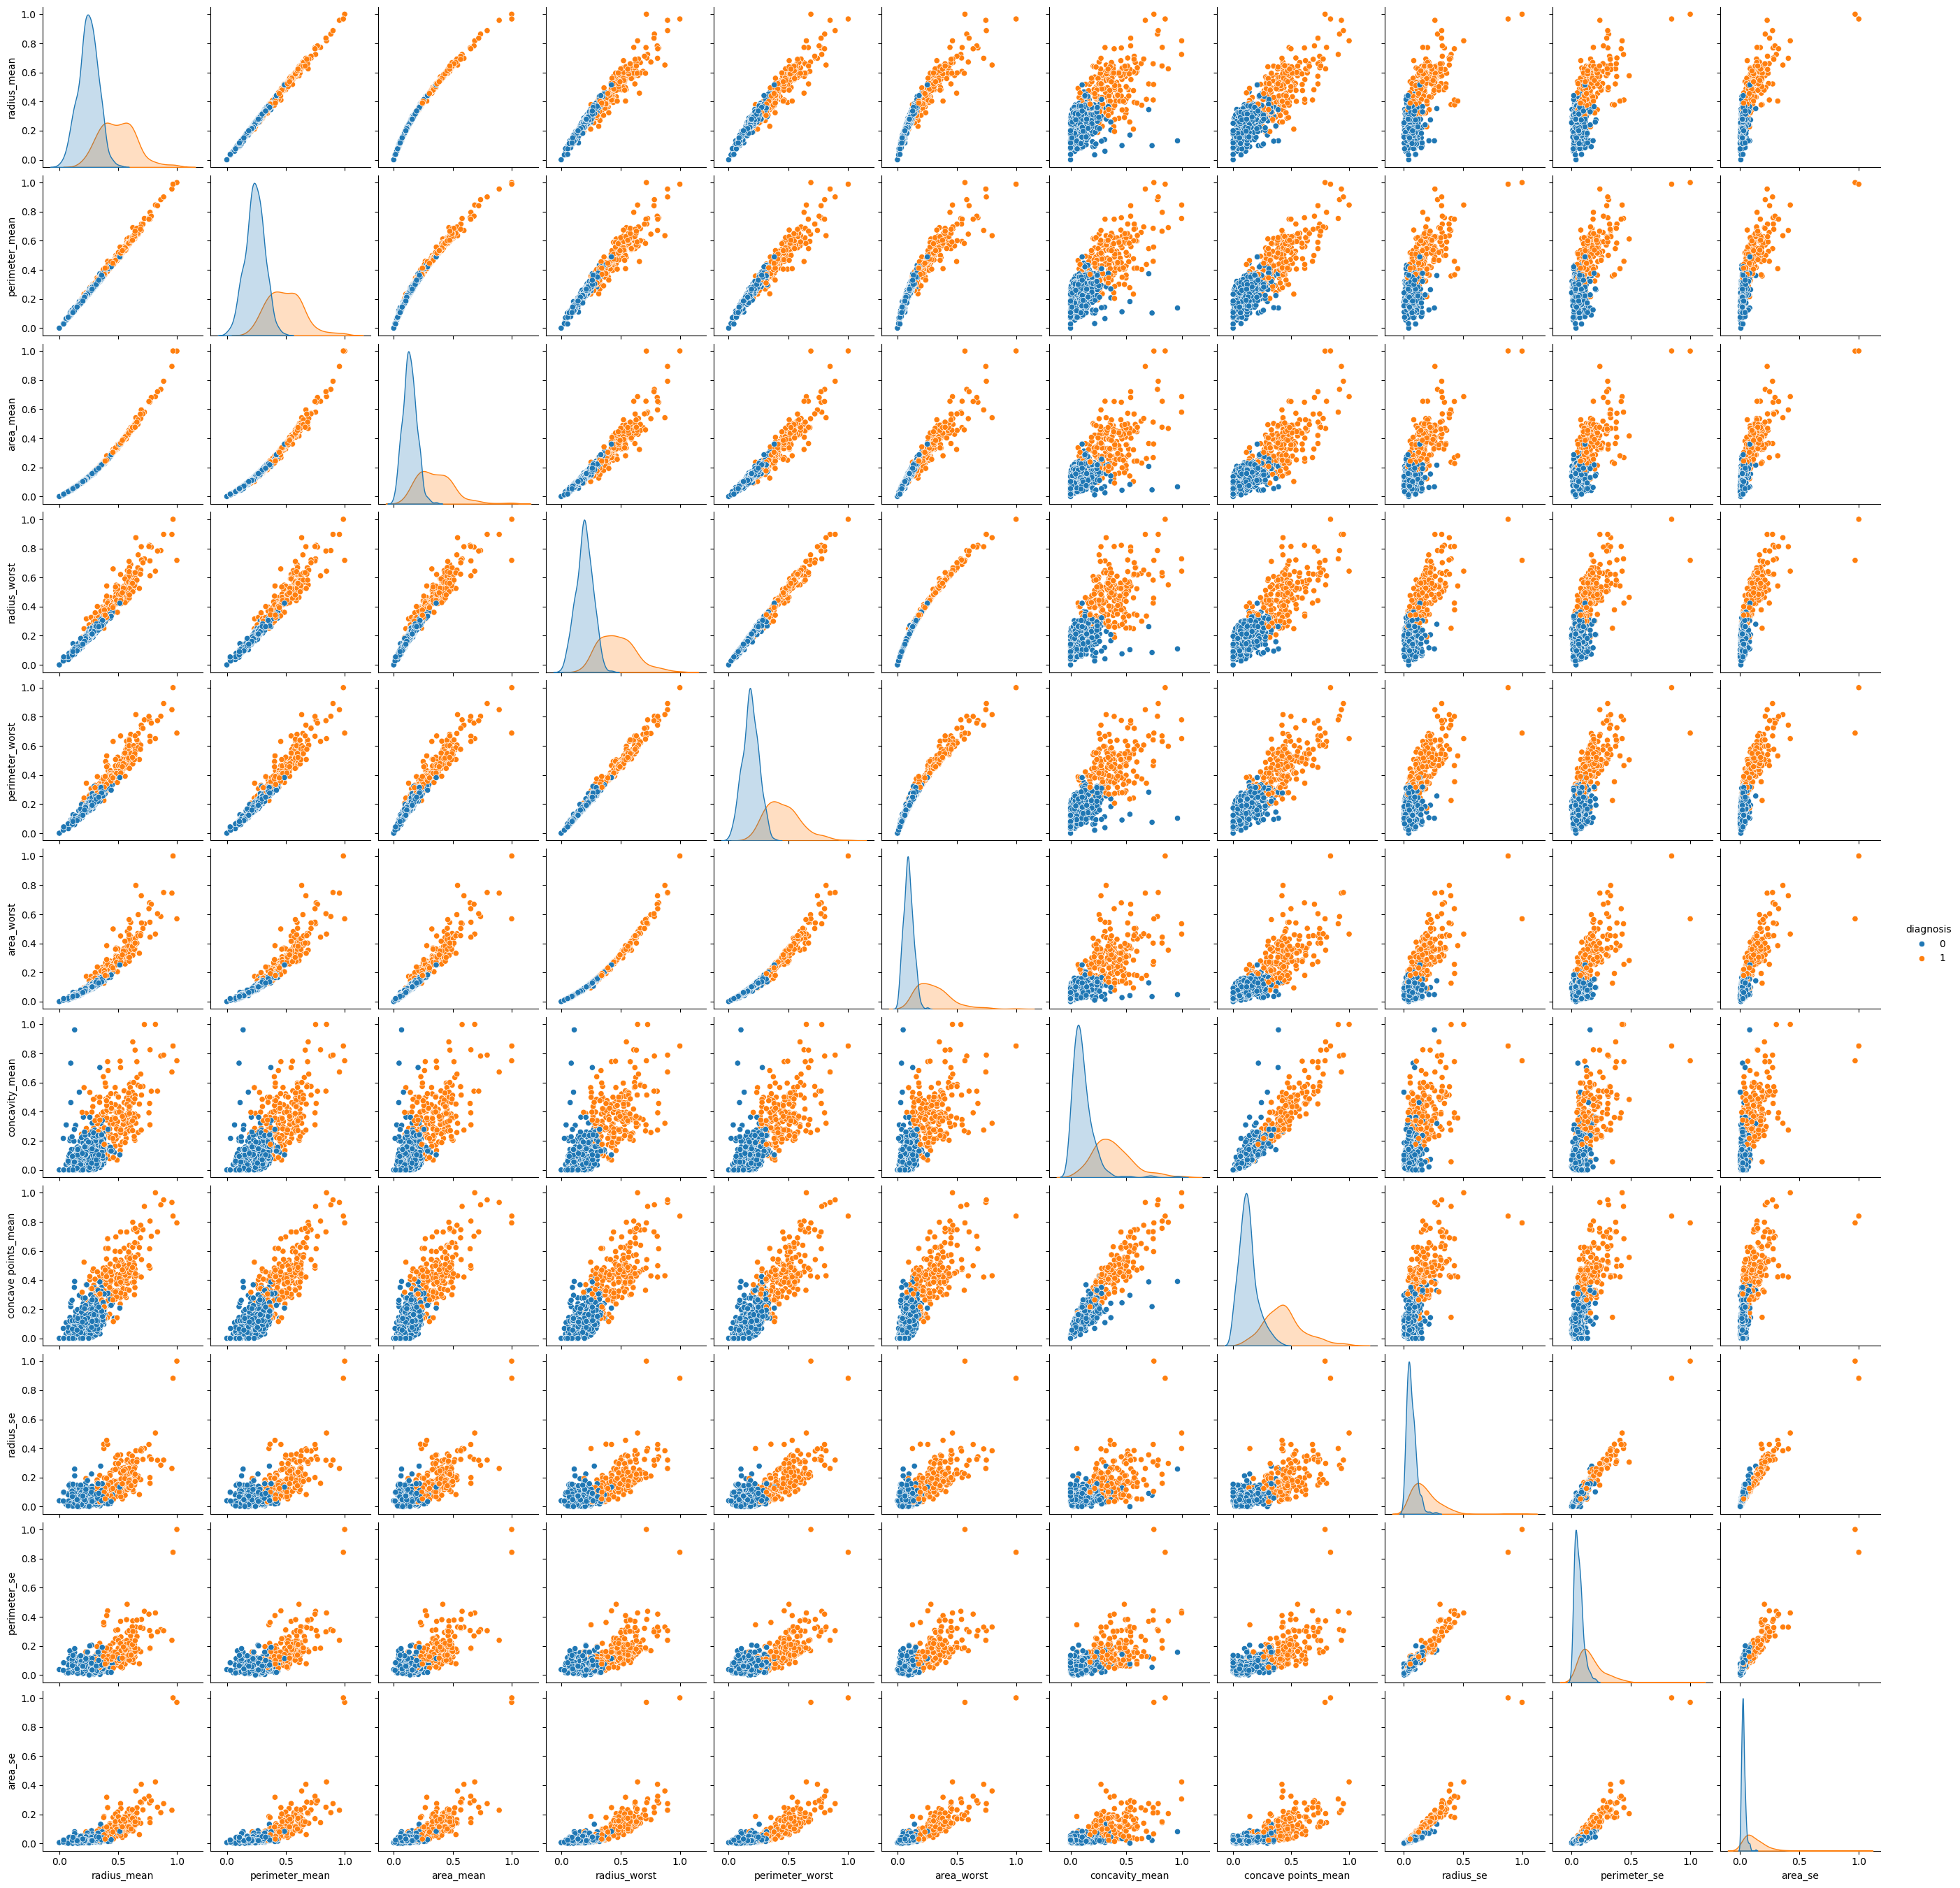

In [278]:
sn.pairplot(data, hue = 'diagnosis', vars = ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se'])

<h2>5.2 Correlation Matrix heat map.</h2> 


<Axes: >

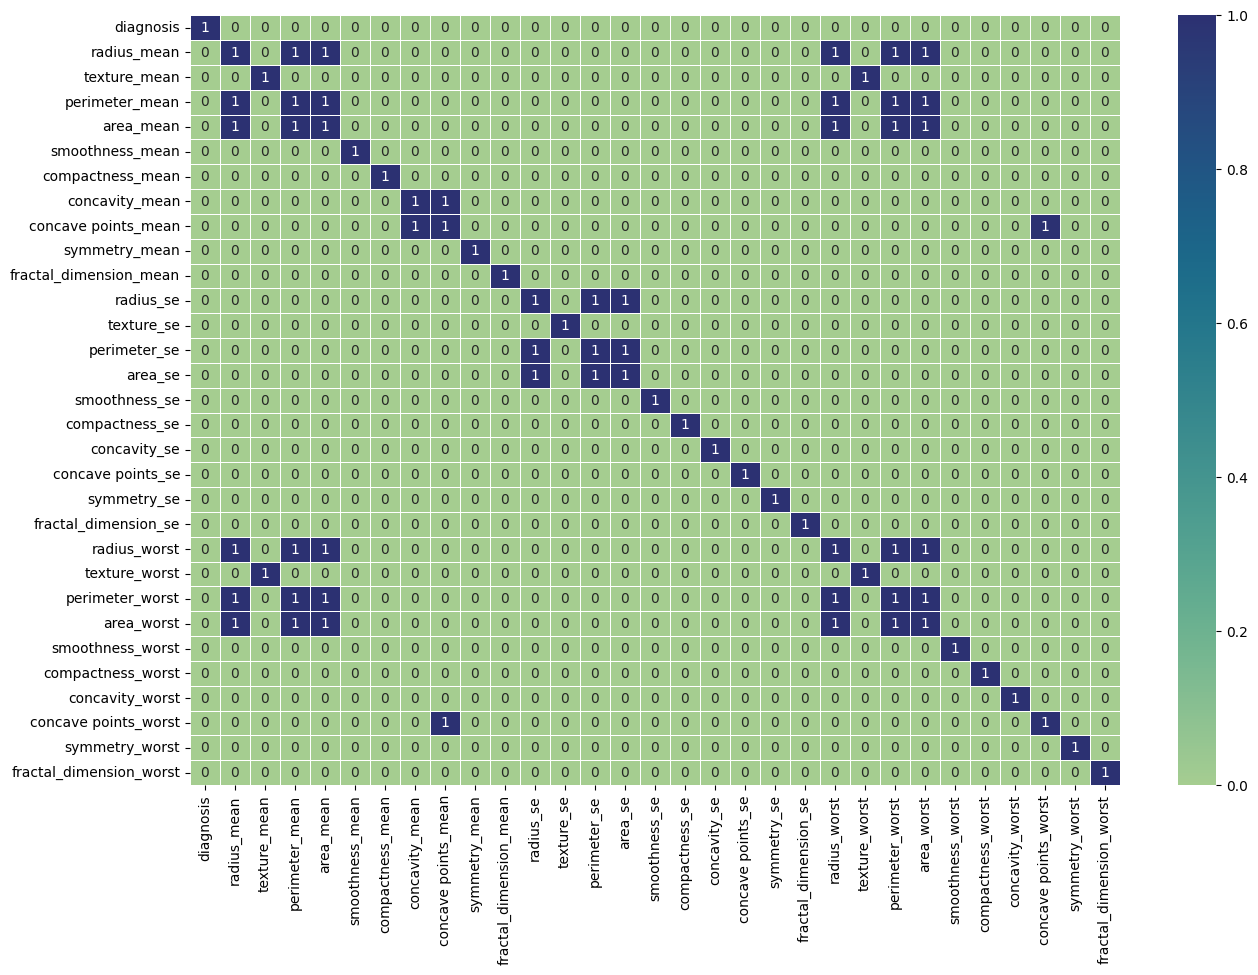

In [279]:
fig, ax = plt.subplots(figsize=(15, 10))
sn.heatmap(data.corr() >= 0.9,annot = True,  linewidth=.5, cmap="crest")

<p>We can conclude, there is high correlation (threshold = 0.9) between:</p>
<ul>
<li>radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst</li>
<li>texture_mean and texture_worst</li>
<li>concavity_mean and concave points_mean</li>
<li>concave points_mean and concave points_worst</li>
<li>radius_se, perimeter_se, area_se</li>
</ul>
<p>So we can reduce the size of the data by keeping one of the variables having high correlation (Threshold = 0.9):<p>
<table border="1">
        <tr>
            <td>KEEP</td>
            <td>REMOVE</td>
        </tr>
        <tr>
            <td>radius_mean</td>
            <td>perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst</td>
        </tr>
        <tr>
            <td>texture_mean</td>
            <td>texture_worst</td>
        </tr>
        <tr>
            <td>concavity_mean</td>
            <td>concave points_mean</td>
        </tr>
        <tr>
            <td>radius_se</td>
            <td>perimeter_se, area_se</td>
        </tr>
    </table>


<h2>53. drop features having high correlation with threshold = 0.9</h2>

In [280]:
data.drop(columns = ['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst', 'concave points_mean', 'perimeter_se', 'area_se'], inplace = True)

<h2>5.4 Box plots for the features.</h2> 

<Axes: >

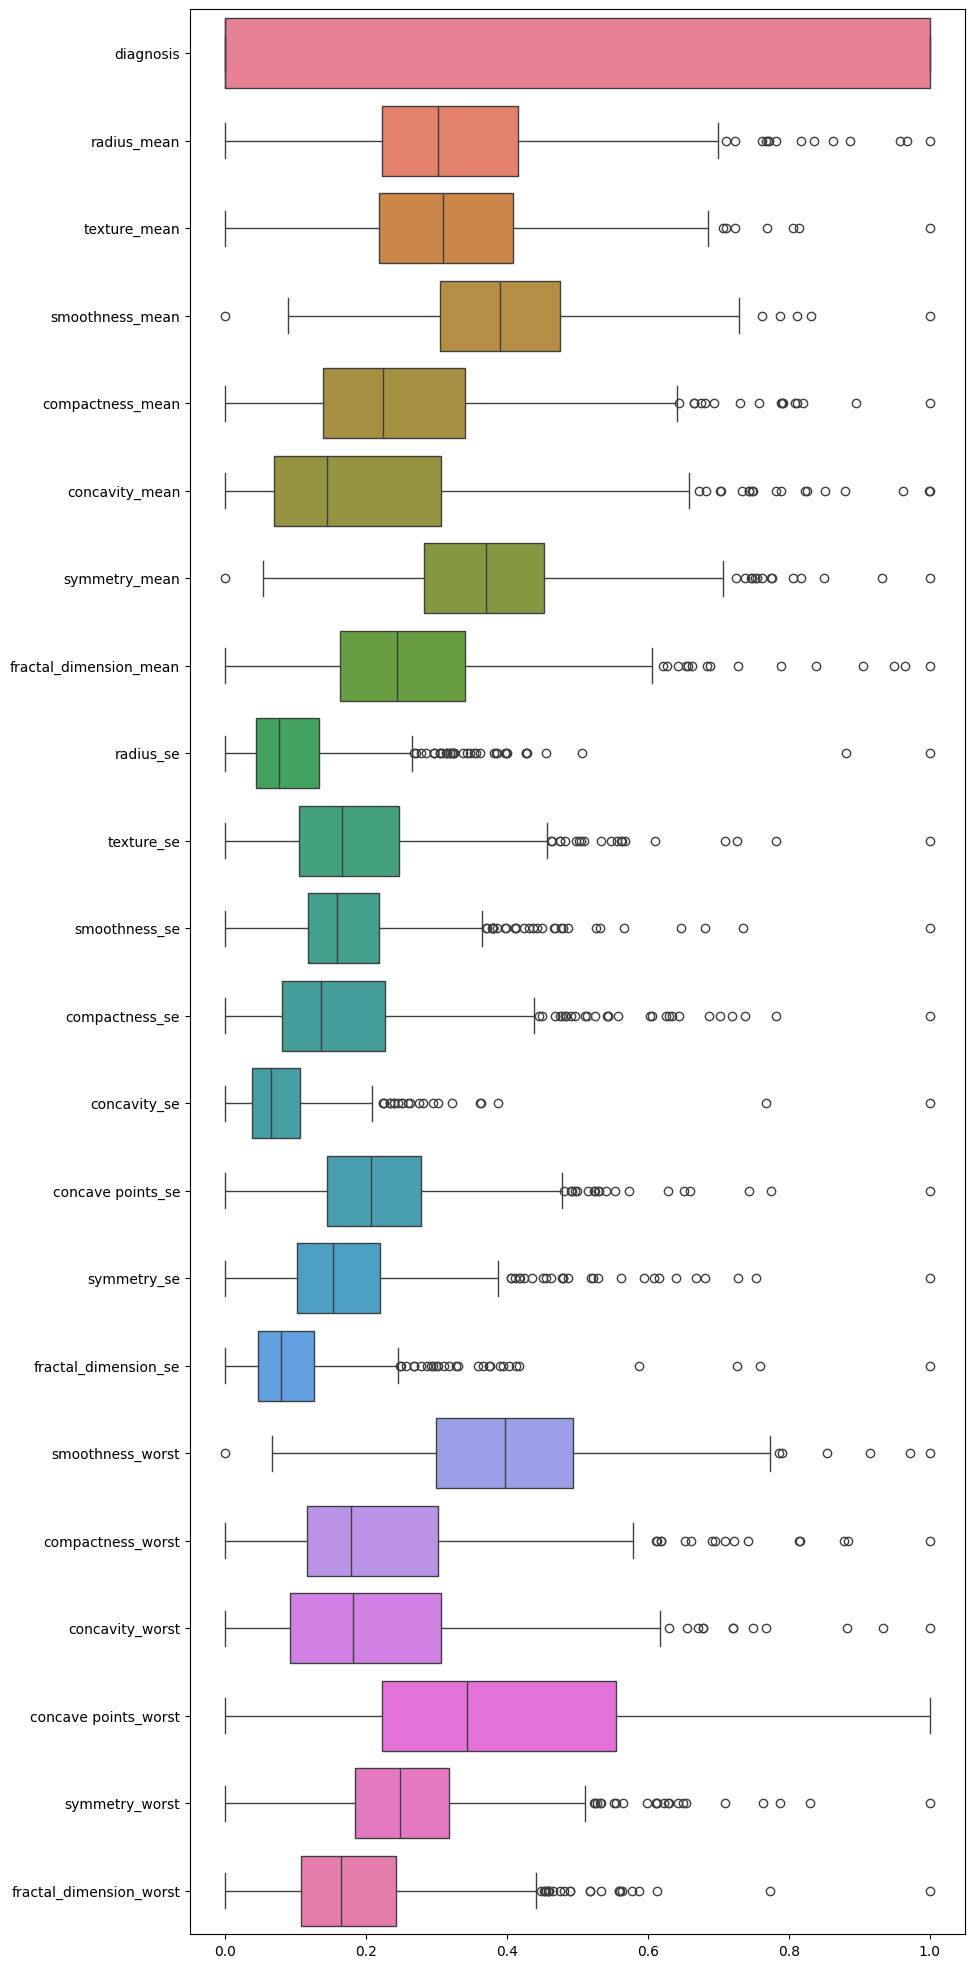

In [281]:
#box plots show in five points and outliers
fig, ax = plt.subplots(figsize=(10, 25))
sn.boxplot(data, orient = "h")

<h2>5.5 Violin plot</h2>

<Axes: >

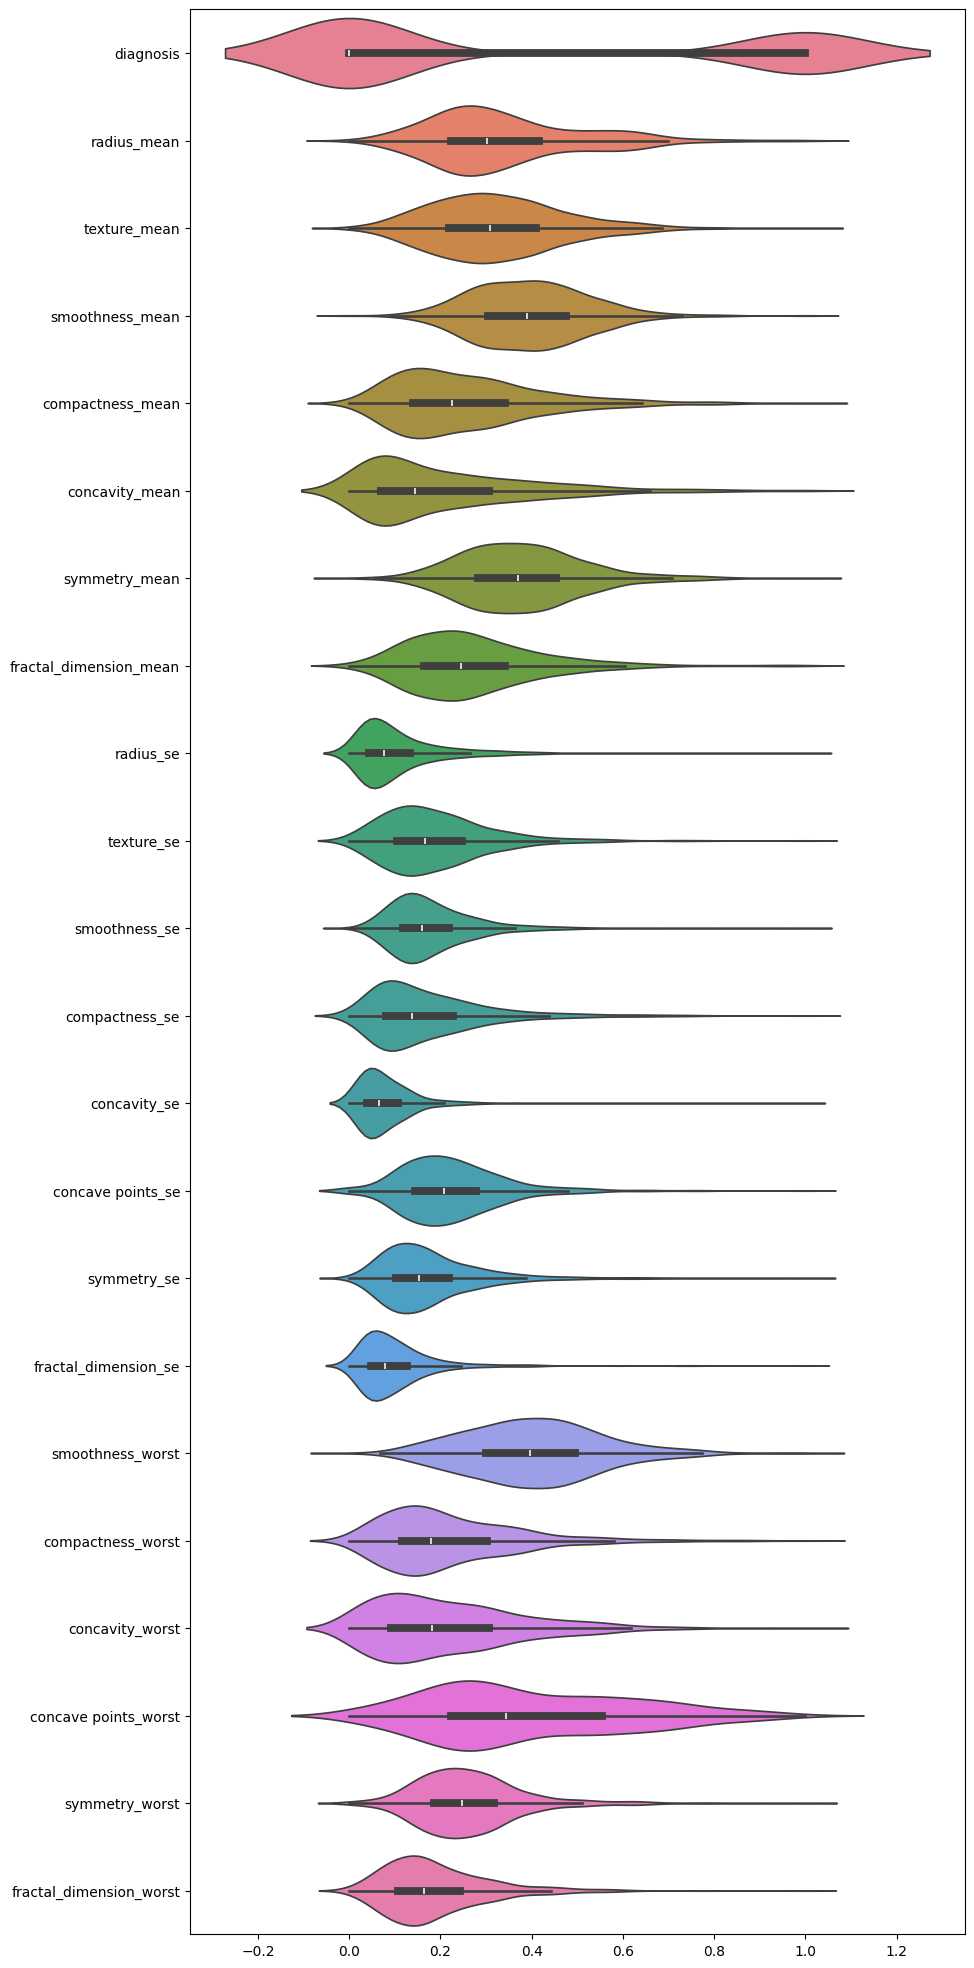

In [282]:
#violin plot show five points and outliers
fig, ax = plt.subplots(figsize=(10, 25))
sn.violinplot(data, orient = "h")

<p>We can conclude many variables have outliers that need to be removed before any process on the data, but if we remove outliers with threshold = 1.5, more than 75% of the data are gone</p>

<h1>Download the refined data as data_refined.csv</h1>

In [283]:
#use write method to download the data
data.to_csv('data_refined.csv', index=False)


In [284]:
#cheking if we can reuse it later
data_ref = pd.read_csv('data_refined.csv')
data_ref.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.593753,0.792037,0.703140,0.686364,0.605518,0.356147,0.120469,...,0.135682,0.300625,0.311645,0.183042,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.289880,0.181768,0.203608,0.379798,0.141323,0.156437,0.082589,...,0.046970,0.253836,0.084539,0.091110,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.514309,0.431017,0.462512,0.509596,0.211247,0.229622,0.094303,...,0.096768,0.389847,0.205690,0.127006,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.811321,0.811361,0.565604,0.776263,1.000000,0.139091,0.175875,...,0.142955,0.353665,0.728148,0.287205,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.430351,0.347893,0.463918,0.378283,0.186816,0.233822,0.093065,...,0.143636,0.357075,0.136179,0.145800,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
